In [1]:
from qutip import baths,fit_utils

### Ejemplo de nueva clase

In [2]:
def spectral_density(w,gamma=2,w0=5,lam=1):
    return lam**2 * gamma * w / ((w**2 - w0**2)**2
                                           + (gamma*w)**2)
def power(w,gamma=2,w0=5,lam=1,T=1):
    return 2*np.sign(w)*spectral_density(np.abs(w))*(bose(w,T)+1)
def bose(w,T):
    if T == 0:
        return np.zeros_like(w)

    w = np.array(w, dtype=float)
    result = np.zeros_like(w)
    non_zero = w != 0
    result[non_zero] = 1 / (np.exp(w[non_zero] / T) - 1)
    return result

## From the spectral Density

In [3]:
bb=baths.BosonicReservoir.from_SD(T=1,J=spectral_density)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

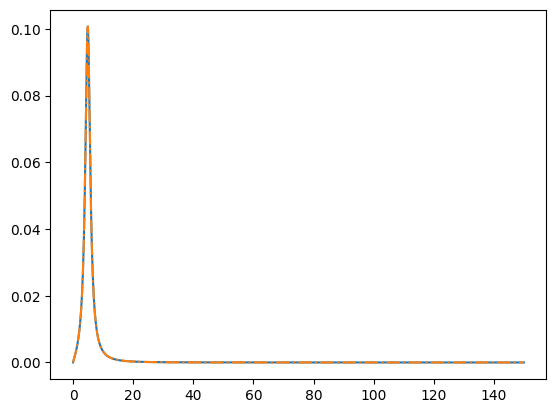

In [5]:
w=np.linspace(0,150,1000)
plt.plot(w,bb.spectral_density(w))
plt.plot(w,spectral_density(w),"-.")
plt.show()

In [6]:
w2=np.linspace(-150,150,1000)

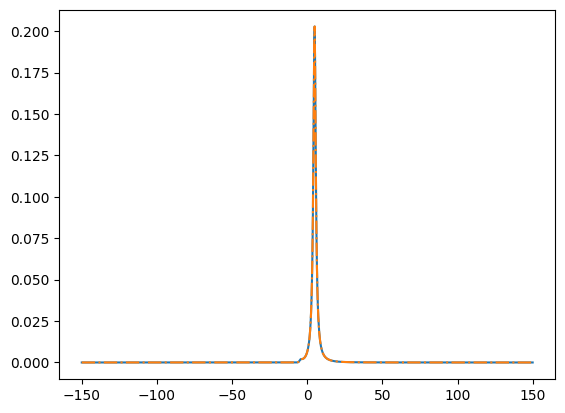

In [7]:
plt.plot(w2,bb.power_spectrum(w2))
plt.plot(w2,power(w2),"-.")
plt.show()

In [8]:
t=np.linspace(0,30,100)

In [9]:
cc=bb.correlation_function(t)

/home/mcditoos/github/qutip_gsoc_app/qutip/baths.py:128: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / self.T) - 1)


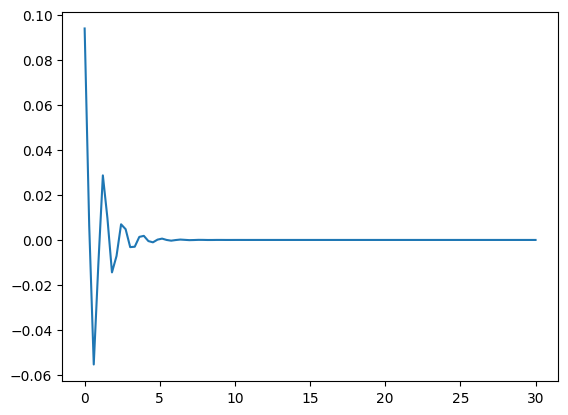

In [10]:
plt.plot(t,np.real(cc))
plt.show()

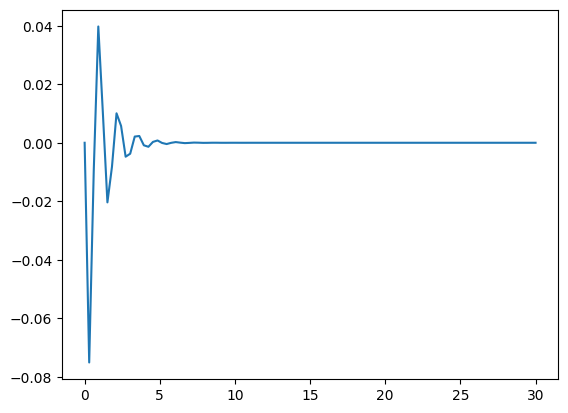

In [11]:
plt.plot(t,np.imag(cc))
plt.show()

# From the power spectrum

In [12]:
bb2=baths.BosonicReservoir.from_PS(T=1,S=power)

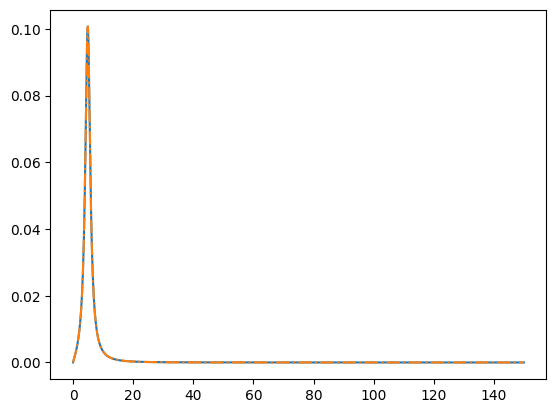

In [13]:
plt.plot(w,bb2.spectral_density(w))
plt.plot(w,spectral_density(w),"-.")
plt.show()

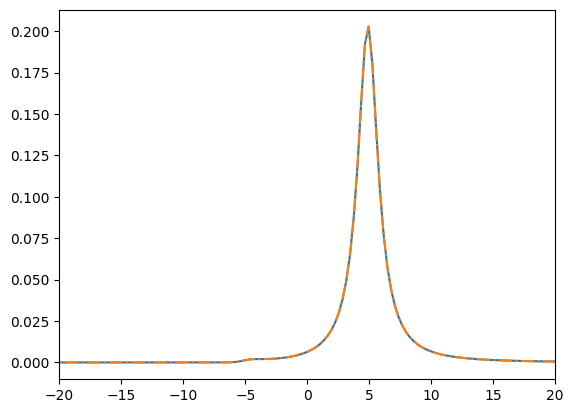

In [14]:
plt.plot(w2,bb2.power_spectrum(w2))
plt.plot(w2,power(w2),"-.")
plt.xlim(-20,20)
plt.show()

In [15]:
cc2=bb2.correlation_function(t)

/tmp/ipykernel_74220/1169748114.py:13: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / T) - 1)


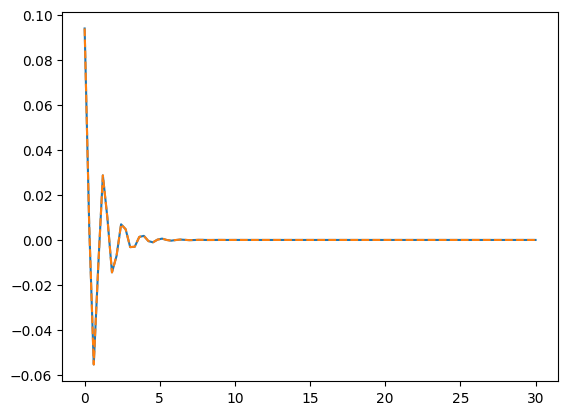

In [16]:
plt.plot(t,np.real(cc))
plt.plot(t,np.real(cc2),"--")
plt.show()

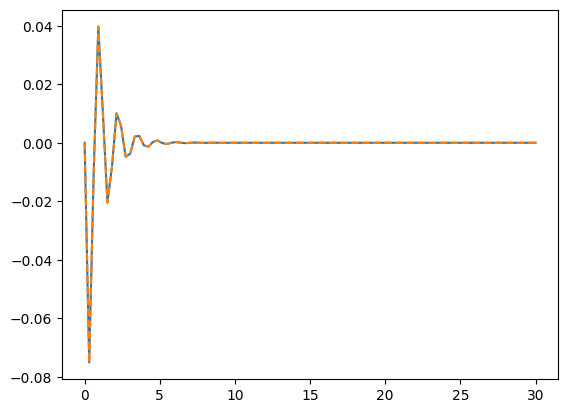

In [17]:
plt.plot(t,np.imag(cc))
plt.plot(t,np.imag(cc2),"--")
plt.show()

### From the correlation function (Here I construct the correlation function from the HEOM out of lazyness)

In [18]:
from qutip.solver.heom import UnderDampedBath,BathExponent
from qutip import sigmaz

In [19]:
fromheom=UnderDampedBath(Q=sigmaz(),T=1,lam=1,gamma=2,w0=5,Nk=6)

In [20]:
t2=np.linspace(0,100,10000)
corr = np.zeros_like(t2, dtype=complex)
for exp in fromheom.exponents:
    if (
        exp.type == BathExponent.types['R'] or
        exp.type == BathExponent.types['RI']
    ):
        corr += exp.ck * np.exp(-exp.vk * np.abs(t2))
    if exp.type == BathExponent.types['I']:
        corr += 1j*exp.ck * np.exp(-exp.vk * np.abs(t2))
    if exp.type == BathExponent.types['RI']:
        corr += 1j*exp.ck2 * np.exp(-exp.vk * np.abs(t2))

In [21]:
bb3=baths.BosonicReservoir.from_CF(T=1,C=corr,t=t2)

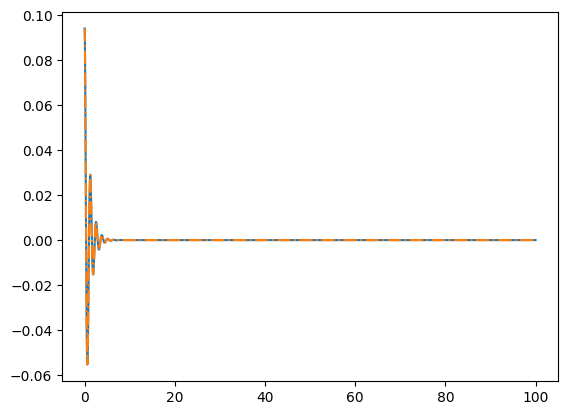

In [22]:
plt.plot(t2,np.real(corr))
plt.plot(t2,np.real(bb3.correlation_function(t2)),"-.")
plt.show()

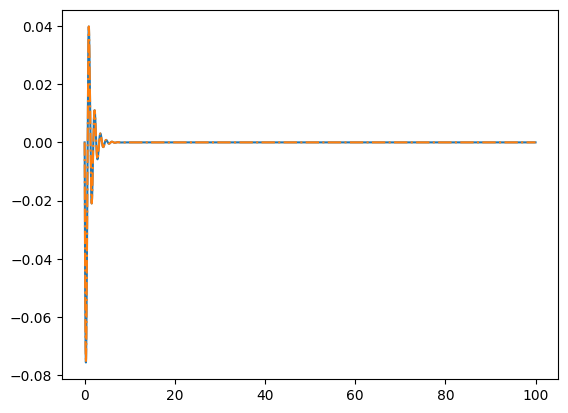

In [23]:
plt.plot(t2,np.imag(corr))
plt.plot(t2,np.imag(bb3.correlation_function(t2)),"-.")
plt.show()

/home/mcditoos/miniconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mcditoos/miniconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


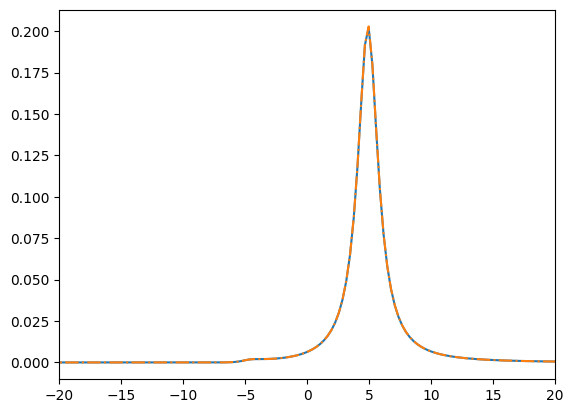

In [24]:
plt.plot(w2,bb3.power_spectrum(w2))
plt.plot(w2,power(w2),"-.")
plt.xlim(-20,20)
plt.show()

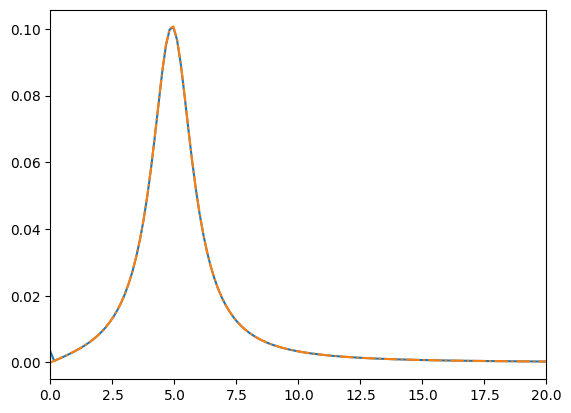

In [25]:
plt.plot(w,bb3.spectral_density(w))
plt.plot(w,spectral_density(w),"-.")
plt.xlim(0,20)
plt.show()

### Exponential approximations 

In [26]:
from qutip import sigmaz

In [27]:
t=np.linspace(0,30,500)

In [28]:
approx_mat=baths.ApproximatedBosonicBath.from_matsubara_UD(Q=sigmaz(),lam=1,gamma=2,w0=5,Nk=5,T=1)
approx_fit_corr=baths.ApproximatedBosonicBath.from_cf(Q=sigmaz(),bath=bb,Nr=5,Ni=1,x=t,full_ansatz=False)#fit_from_cf
approx_fit_sd=baths.ApproximatedBosonicBath.from_sd(Q=sigmaz(),bath=bb,N=1,Nk=5,x=w)
approx_fit_ps=baths.ApproximatedBosonicBath.from_ps(Q=sigmaz(),bath=bb,x=w2,tol=1e-8,max_exponents=24)

In [29]:
print(approx_fit_corr.fitinfo["summary"])

Fit correlation class instance: 
 
Result of fitting The Real Part Of                                      |Result of fitting The Imaginary Part                                    
 the Correlation Function with 5 terms:                                 | Of the Correlation Function with 1 terms:                              
                                                                        |                                                                        
 Parameters|    a     |    b     |    c                                 | Parameters|    a     |    b     |    c                                 
 1         | 1.88e+00 |-1.15e+00 |4.77e+00                              | 1         |-1.02e-01 |-1.00e+00 |4.90e+00                              
 2         | 1.48e+00 |-5.97e+00 |3.29e-01                              |                                                                        
 3         |-1.17e+00 |-1.19e+00 |4.79e+00                              |A  normalized RM

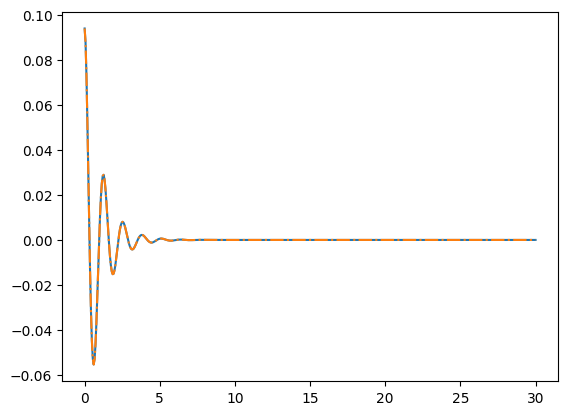

In [30]:
plt.plot(t,approx_fit_ps.correlation_function_approx(t))
plt.plot(t,bb.correlation_function(t),"-.")


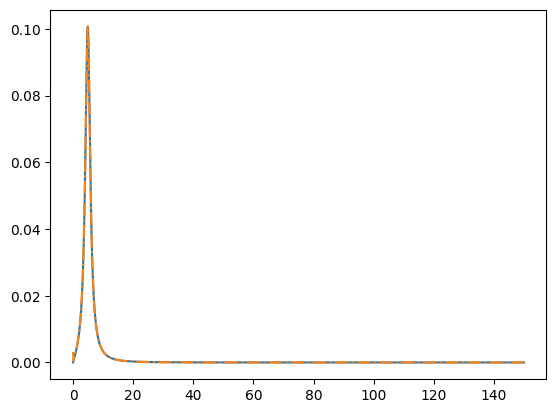

In [31]:
plt.plot(w,bb.spectral_density(w))
plt.plot(w,approx_fit_ps.spectral_density_approx(w),"-.")

(-20.0, 20.0)

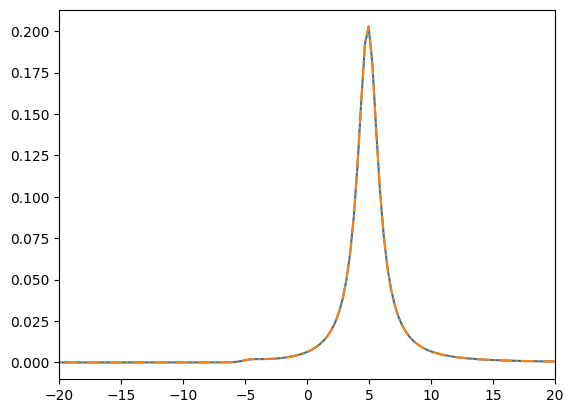

In [32]:
plt.plot(w2,bb.power_spectrum(w2))
plt.plot(w2,approx_fit_ps.power_spectrum_approx(w2),"-.")
plt.xlim(-20,20)

(-20.0, 20.0)

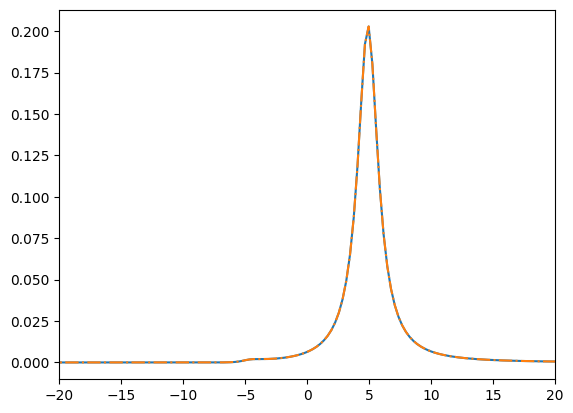

In [33]:
plt.plot(w2,bb.power_spectrum(w2))
plt.plot(w2,approx_mat.power_spectrum_approx(w2),"-.")
plt.xlim(-20,20)